In [36]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [37]:
#Import dataframes 

df_player_stats = pd.read_csv('DataFiles/player_stats.csv')
df_bio = pd.read_csv('DataFiles/df_bio.csv')
data_index = pd.read_csv('DataFiles/data_index.csv')

In [38]:
columns_to_delete = ['PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
                     'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
                     'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
                     'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
                     'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
                     'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
                     'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK']
# Delete the specified columns
df_player_stats.drop(columns=columns_to_delete, inplace=True, errors='ignore')

df_player_stats.rename(columns={'Season_type': 'Season'}, inplace=True)

In [39]:
# Columns to be dropped in 'df_bio' table:
df_bio.drop(columns=['PLAYER_HEIGHT', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'PTS', 'REB', 'AST'], inplace=True, errors='ignore')

In [40]:
# Merge 'df_player_stats' and ‘df_bio‘ on common keys ‘PLAYER_ID‘ and ‘Year‘ in order to get 'COUNTRY' column.
merged_df_stats_bio = pd.merge(df_player_stats, df_bio, on=['PLAYER_ID', 'Year', 'Season'], how='inner')

columns_to_delete_merged = ['GP_y','PTS_y','REB_y','AST_y','NET_RATING','OREB_PCT','DREB_PCT','USG_PCT', 'TS_PCT','AST_PCT']

merged_df_stats_bio.drop(columns=columns_to_delete_merged, inplace=True) 

KeyError: "['PTS_y', 'REB_y', 'AST_y'] not found in axis"

In [41]:
# Checking the result of 'merged_df_stats_bio'
merged_df_stats_bio.shape

(18282, 49)

In [45]:
# Merging 'merged_df_stat_bio' with player index table on player-id to get player´s role/position.
final_merged_df = pd.merge(merged_df_stats_bio, data_index, left_on='PLAYER_ID', right_on='PERSON_ID', how='inner')

# Dropping all duplicate columns with trailing letter 'y'.
columns_to_drop = [col for col in final_merged_df.columns if 'y' in col]
final_merged_df.drop(columns=columns_to_drop, inplace=True)

# Dropping redundant columns
columns_to_drop_2 = [
    'PLAYER_LAST_NAME',
    'PLAYER_FIRST_NAME',
    'PLAYER_SLUG',
    'TEAM_ID',
    'TEAM_SLUG',
    'IS_DEFUNCT',
    'TEAM_NAME',
    'NICKNAME',
    'TEAM_ABBREVIATION',
    'ROSTER_STATUS',
    'STATS_TIMEFRAME', 
    'PERSON_ID',
    'TEAM_CITY'
]

final_merged_df.drop(columns=columns_to_drop_2, inplace=True)

In [46]:
# Drop '_x' at the end of column names 
for column in final_merged_df.columns: 
    if '_x' in column: 
        column_name = column.replace('_x', '')
        final_merged_df.rename(columns={column:column_name}, inplace=True)

# Change regular season name at 'Season' column  
final_merged_df['Season'] = final_merged_df['Season'].apply(lambda x:'Regular Season' if x =='Regular%20Season' else x)

final_merged_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR
0,920,A.C. Green,1610612742,DAL,33.0,83,23,60,0.277,30.1,2.8,5.8,0.483,0.0,0.2,0.050,1.5,2.4,0.650,2.7,5.2,7.9,0.8,0.9,0.8,0.2,0.5,1.7,0.0,7.2,1996-97,Regular Season,Oregon State,USA,1985,1,23,-7.4,0.089,0.184,0.118,0.523,0.045,45,F,6-9,225.0,1985,2000
1,920,A.C. Green,1610612742,DAL,34.0,82,20,62,0.244,32.3,3.0,6.5,0.453,0.0,0.0,0.000,1.4,2.0,0.716,2.7,5.5,8.1,1.5,0.8,1.0,0.3,0.4,1.9,0.0,7.3,1997-98,Regular Season,Oregon State,USA,1985,1,23,-7.3,0.081,0.173,0.116,0.496,0.074,45,F,6-9,225.0,1985,2000
2,920,A.C. Green,1610612742,DAL,35.0,50,19,31,0.380,18.5,2.2,5.1,0.422,0.0,0.2,0.000,0.6,1.0,0.577,1.6,2.9,4.6,0.5,0.4,0.6,0.2,0.3,1.4,0.0,4.9,1998-99,Regular Season,Oregon State,USA,1985,1,23,-5.0,0.086,0.163,0.144,0.441,0.043,45,F,6-9,225.0,1985,2000
3,920,A.C. Green,1610612747,LAL,36.0,82,67,15,0.817,23.5,2.1,4.7,0.447,0.0,0.0,0.250,0.8,1.2,0.695,2.0,4.0,5.9,1.0,0.6,0.6,0.2,0.3,1.5,0.2,5.0,1999-00,Regular Season,Oregon State,USA,1985,1,23,8.3,0.080,0.160,0.110,0.482,0.058,45,F,6-9,225.0,1985,2000
4,920,A.C. Green,1610612747,LAL,36.0,23,15,8,0.652,18.7,1.6,3.9,0.411,0.0,0.0,0.000,0.7,1.0,0.696,1.9,2.3,4.2,0.6,0.4,0.6,0.1,0.2,1.9,0.1,3.9,1999-00,Playoffs,Oregon State,USA,1985,1,23,-3.9,0.095,0.126,0.115,0.449,0.044,45,F,6-9,225.0,1985,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277,1631246,Vince Williams Jr.,1610612763,MEM,22.0,15,7,8,0.467,7.0,0.8,2.7,0.300,0.3,1.9,0.143,0.1,0.1,1.000,0.3,0.7,1.0,0.3,0.3,0.4,0.1,0.1,0.8,0.2,2.0,2022-23,Regular Season,Virginia Commonwealth,USA,2022,2,47,-14.8,0.030,0.120,0.176,0.367,0.062,5,G,6-4,205.0,2022,2023
18278,1631117,Walker Kessler,1610612762,UTA,21.0,74,34,40,0.459,23.0,4.0,5.6,0.720,0.0,0.0,0.333,1.1,2.1,0.516,3.1,5.3,8.4,0.9,0.8,0.4,2.3,0.5,2.3,1.7,9.2,2022-23,Regular Season,Auburn,USA,2022,1,22,3.0,0.133,0.205,0.130,0.702,0.057,24,C,7-0,245.0,2022,2023
18279,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,29,16,13,0.552,5.3,0.6,1.5,0.419,0.1,0.6,0.118,0.1,0.2,0.800,0.1,0.5,0.6,0.6,0.3,0.3,0.2,0.1,0.4,0.2,1.4,2022-23,Regular Season,Duke,USA,2022,1,26,-13.5,0.025,0.086,0.139,0.465,0.162,7,G,6-5,215.0,2022,2023
18280,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,1,0,1,0.000,2.1,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-23,Playoffs,Duke,USA,2022,1,26,20.0,0.000,0.000,0.200,0.000,0.000,7,G,6-5,215.0,2022,2023


In [48]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [49]:
# Function to filer on countries
def filter_non_europe(df, column_name='', country_list=europe):
    return df[~df[column_name].isin(europe)]

# New object df for European players only
usa_others_df = filter_non_europe(final_merged_df, 'COUNTRY')
usa_others_df.head(10)

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR
0,920,A.C. Green,1610612742,DAL,33.0,83,23,60,0.277,30.1,2.8,5.8,0.483,0.0,0.2,0.050,1.5,2.4,0.650,2.7,5.2,7.9,0.8,0.9,0.8,0.2,0.5,1.7,0.0,7.2,1996-97,Regular Season,Oregon State,USA,1985,1,23,-7.4,0.089,0.184,0.118,0.523,0.045,45,F,6-9,225.0,1985,2000
1,920,A.C. Green,1610612742,DAL,34.0,82,20,62,0.244,32.3,3.0,6.5,0.453,0.0,0.0,0.000,1.4,2.0,0.716,2.7,5.5,8.1,1.5,0.8,1.0,0.3,0.4,1.9,0.0,7.3,1997-98,Regular Season,Oregon State,USA,1985,1,23,-7.3,0.081,0.173,0.116,0.496,0.074,45,F,6-9,225.0,1985,2000
2,920,A.C. Green,1610612742,DAL,35.0,50,19,31,0.380,18.5,2.2,5.1,0.422,0.0,0.2,0.000,0.6,1.0,0.577,1.6,2.9,4.6,0.5,0.4,0.6,0.2,0.3,1.4,0.0,4.9,1998-99,Regular Season,Oregon State,USA,1985,1,23,-5.0,0.086,0.163,0.144,0.441,0.043,45,F,6-9,225.0,1985,2000
3,920,A.C. Green,1610612747,LAL,36.0,82,67,15,0.817,23.5,2.1,4.7,0.447,0.0,0.0,0.250,0.8,1.2,0.695,2.0,4.0,5.9,1.0,0.6,0.6,0.2,0.3,1.5,0.2,5.0,1999-00,Regular Season,Oregon State,USA,1985,1,23,8.3,0.080,0.160,0.110,0.482,0.058,45,F,6-9,225.0,1985,2000
4,920,A.C. Green,1610612747,LAL,36.0,23,15,8,0.652,18.7,1.6,3.9,0.411,0.0,0.0,0.000,0.7,1.0,0.696,1.9,2.3,4.2,0.6,0.4,0.6,0.1,0.2,1.9,0.1,3.9,1999-00,Playoffs,Oregon State,USA,1985,1,23,-3.9,0.095,0.126,0.115,0.449,0.044,45,F,6-9,225.0,1985,2000
5,920,A.C. Green,1610612748,MIA,37.0,82,50,32,0.610,17.2,1.8,4.0,0.444,0.0,0.1,0.000,1.0,1.4,0.712,1.3,2.5,3.8,0.5,0.5,0.4,0.1,0.4,1.5,0.0,4.5,2000-01,Regular Season,Oregon State,USA,1985,1,23,3.8,0.076,0.151,0.137,0.492,0.050,45,F,6-9,225.0,1985,2000
6,920,A.C. Green,1610612748,MIA,37.0,3,0,3,0.000,7.1,0.3,1.0,0.333,0.0,0.0,0.000,0.3,0.3,1.000,0.3,1.0,1.3,0.7,0.3,0.3,0.0,0.0,1.3,0.0,1.0,2000-01,Playoffs,Oregon State,USA,1985,1,23,-24.0,0.045,0.136,0.082,0.436,0.154,45,F,6-9,225.0,1985,2000
7,243,Aaron McKie,1610612765,DET,24.0,83,48,35,0.578,19.6,1.8,4.4,0.411,0.5,1.2,0.398,1.1,1.3,0.836,0.5,2.2,2.7,1.9,1.1,0.9,0.3,0.4,1.6,0.0,5.2,1996-97,Regular Season,Temple,USA,1994,1,17,3.7,0.026,0.113,0.142,0.524,0.163,2,G,6-5,209.0,1994,2006
8,243,Aaron McKie,1610612765,DET,24.0,5,2,3,0.400,19.3,1.4,4.0,0.350,0.2,1.0,0.200,0.0,0.0,0.000,0.2,1.8,2.0,2.0,0.6,1.2,0.4,0.8,2.4,1.0,3.0,1996-97,Playoffs,Temple,USA,1994,1,17,4.6,0.011,0.101,0.116,0.375,0.179,2,G,6-5,209.0,1994,2006
9,243,Aaron McKie,1610612755,PHI,25.0,81,34,47,0.420,22.4,1.7,4.7,0.365,0.1,0.8,0.190,0.5,0.7,0.764,0.7,2.1,2.9,2.2,0.9,1.2,0.2,0.4,2.0,0.0,4.1,1997-98,Regular Season,Temple,USA,1994,1,17,1.8,0.032,0.098,0.117,0.410,0.159,2,G,6-5,209.0,1994,2006


In [50]:
# Function to filer on countries
def filter_europe(df, column_name='', country_list=europe):
    return df[df[column_name].isin(europe)]

# New object df for European players only
europe_df = filter_europe(final_merged_df, 'COUNTRY')
europe_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR
69,1059,Aleksandar Djordjevic,1610612757,POR,29.0,8,4,4,0.500,7.8,1.0,2.0,0.500,0.6,0.9,0.714,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.6,0.0,0.0,0.0,0.4,0.0,3.1,1996-97,Regular Season,None,Serbia,Undrafted,Undrafted,Undrafted,5.1,0.017,0.063,0.168,0.687,0.135,19,G,6-2,198.0,1996,1996
286,717,Arvydas Sabonis,1610612757,POR,32.0,69,43,26,0.623,25.5,4.8,9.5,0.498,0.7,1.9,0.371,3.2,4.2,0.777,1.7,6.3,7.9,2.1,2.2,0.9,1.2,0.5,2.9,0.0,13.4,1996-97,Regular Season,None,Lithuania,1986,1,24,9.9,0.071,0.249,0.239,0.592,0.136,11,C,7-3,292.0,1995,2002
287,717,Arvydas Sabonis,1610612757,POR,32.0,4,1,3,0.250,26.8,4.5,10.5,0.429,0.5,2.0,0.250,1.8,2.0,0.875,2.0,4.5,6.5,2.3,2.3,0.8,0.8,1.3,4.8,2.0,11.3,1996-97,Playoffs,None,Lithuania,1986,1,24,-18.6,0.081,0.202,0.239,0.494,0.170,11,C,7-3,292.0,1995,2002
288,717,Arvydas Sabonis,1610612757,POR,33.0,73,40,33,0.548,31.9,5.6,11.3,0.493,0.4,1.6,0.261,4.4,5.5,0.798,2.0,7.9,10.0,3.0,2.6,0.9,1.1,0.6,3.7,0.0,16.0,1997-98,Regular Season,None,Lithuania,1986,1,24,6.0,0.068,0.253,0.230,0.581,0.161,11,C,7-3,292.0,1995,2002
289,717,Arvydas Sabonis,1610612757,POR,33.0,4,1,3,0.250,26.6,4.5,10.0,0.450,0.3,0.5,0.500,3.0,3.5,0.857,1.8,6.0,7.8,1.5,2.5,1.8,0.8,1.8,4.8,0.0,12.3,1997-98,Playoffs,None,Lithuania,1986,1,24,2.1,0.063,0.258,0.238,0.531,0.098,11,C,7-3,292.0,1995,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18252,1631217,Moussa Diabate,1610612746,LAC,21.0,22,10,12,0.455,8.9,1.1,2.1,0.511,0.0,0.1,0.500,0.5,0.7,0.625,1.4,0.9,2.3,0.2,0.4,0.3,0.4,0.3,0.7,0.7,2.7,2022-23,Regular Season,Michigan,France,2022,2,43,-3.2,0.137,0.106,0.125,0.546,0.029,25,F,6-9,210.0,2022,2023
18254,1631107,Nikola Jovic,1610612748,MIA,20.0,15,7,8,0.467,13.6,1.9,4.6,0.406,0.5,2.3,0.229,1.2,1.3,0.947,0.6,1.5,2.1,0.7,0.7,0.5,0.1,0.0,1.3,1.3,5.5,2022-23,Regular Season,None,Serbia,2022,1,27,-3.5,0.043,0.119,0.185,0.530,0.076,5,F,6-10,205.0,2022,2023
18255,1631107,Nikola Jovic,1610612748,MIA,20.0,7,3,4,0.429,1.8,0.1,0.6,0.250,0.0,0.3,0.000,0.0,0.0,0.000,0.1,0.6,0.7,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.3,2022-23,Playoffs,None,Serbia,2022,1,27,18.5,0.067,0.250,0.118,0.250,0.000,5,F,6-10,205.0,2022,2023
18258,1631172,Ousmane Dieng,1610612760,OKC,20.0,39,20,19,0.513,14.6,1.9,4.6,0.420,0.7,2.5,0.265,0.4,0.6,0.652,0.5,2.2,2.7,1.2,0.7,0.4,0.2,0.2,1.1,0.5,4.9,2022-23,Regular Season,None,France,2022,1,11,2.9,0.030,0.141,0.154,0.505,0.108,13,F,6-9,185.0,2022,2023


In [51]:

player_ppg = usa_others_df.groupby('PLAYER_NAME').agg({
    'PTS': 'mean',              # Mean PPG
    'GP': 'sum'        # Sum of total games played
}).reset_index()
# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_others_players = player_ppg.sort_values(by='PTS', ascending=False).head(10)

ppg_others_players

,PLAYER_NAME,PTS,GP
1318,Kevin Durant,28.103704,1152
1408,LeBron James,27.733333,1703
1598,Michael Jordan,27.450000,346
59,Allen Iverson,26.940909,985
637,Donovan Mitchell,26.000000,457
1137,Joel Embiid,25.600000,447
456,Damian Lillard,25.436842,830
595,Devin Booker,25.318182,573
2131,Trae Young,25.250000,380
2297,Zion Williamson,25.166667,114


In [52]:
# Grouping players by name and calculating the average PPG across all seasons
# player_stats = europe_df.groupby('PLAYER_NAME')['PTS'].mean().reset_index()
player_ppg = europe_df.groupby('PLAYER_NAME').agg({
    'PTS': 'mean',              # Mean PPG
    'GP': 'sum'        # Sum of total games played
}).reset_index()
# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_euro_players = player_ppg.sort_values(by='PTS', ascending=False).head(10)

ppg_euro_players

,PLAYER_NAME,PTS,GP
119,Luka Doncic,29.612500,358
75,Giannis Antetokounmpo,23.994444,798
154,Nikola Jokic,23.346154,664
50,Dirk Nowitzki,21.997222,1667
115,Kristaps Porzingis,19.533333,412
117,Lauri Markkanen,17.100000,348
67,Franz Wagner,16.900000,159
216,Tony Parker,16.408571,1480
158,Nikola Vucevic,16.250000,839
170,Pau Gasol,16.023333,1362


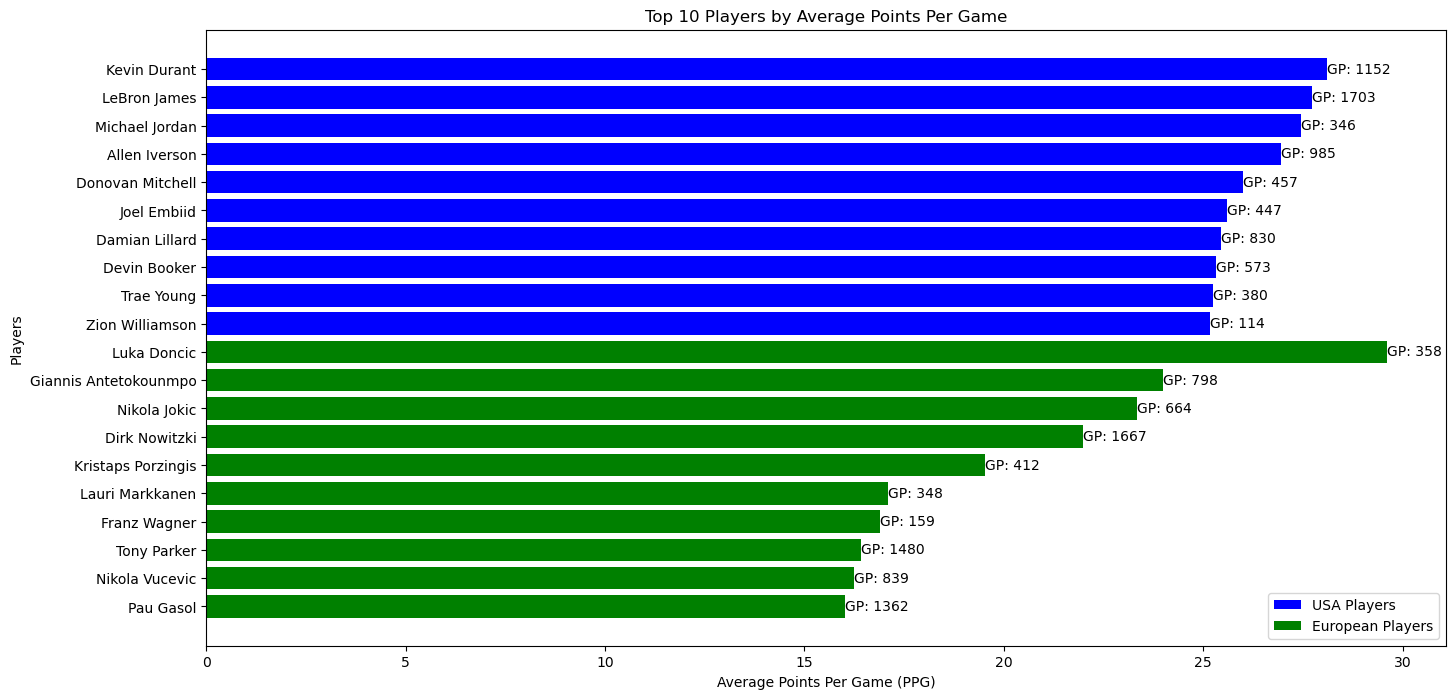

In [53]:
# Data prep
usa_players = ppg_others_players['PLAYER_NAME']
usa_ppg = ppg_others_players['PTS']
usa_gp = ppg_others_players['GP']
euro_players = ppg_euro_players['PLAYER_NAME']
euro_ppg = ppg_euro_players['PTS']
euro_gp = ppg_euro_players['GP']

# Plotting
plt.figure(figsize=(16, 8))

usa_bars = plt.barh(usa_players, usa_ppg, color='blue', label='USA Players')
euro_bars = plt.barh(euro_players, euro_ppg, color='green', label='European Players')

plt.xlabel('Average Points Per Game (PPG)')
plt.ylabel('Players')
plt.title('Top 10 Players by Average Points Per Game')
plt.legend()

plt.gca().invert_yaxis()  # Invert y-axis to display the player with the highest PPG at the top

# Annotating bars with total number of games played
for bar, gp in zip(usa_bars, usa_gp):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'GP: {gp}', va='center')

for bar, gp in zip(euro_bars, euro_gp):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'GP: {gp}', va='center')

plt.show()


In [54]:
# Grouping players by name and calculating the SUM PPG across all seasons
player_stats = europe_df.groupby('PLAYER_NAME')['PTS'].sum().reset_index()

# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_euro_players = player_stats.sort_values(by='PTS', ascending=False).head(10)

ppg_euro_players


,PLAYER_NAME,PTS
50,Dirk Nowitzki,791.9
216,Tony Parker,574.3
170,Pau Gasol,480.7
75,Giannis Antetokounmpo,431.9
173,Peja Stojakovic,368.2
121,Luol Deng,310.9
154,Nikola Jokic,303.5
123,Marc Gasol,302.5
78,Goran Dragic,282.0
41,Danilo Gallinari,279.7


In [55]:
# Grouping players by name and calculating the SUM PPG across all seasons
player_stats = usa_others_df.groupby('PLAYER_NAME')['PTS'].sum().reset_index()

# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_others_players = player_stats.sort_values(by='PTS', ascending=False).head(10)

ppg_others_players

,PLAYER_NAME,PTS
1408,LeBron James,998.4
1352,Kobe Bryant,857.4
1318,Kevin Durant,758.8
2092,Tim Duncan,720.5
298,Carmelo Anthony,702.6
980,James Harden,665.4
671,Dwyane Wade,642.9
1977,Shaquille O'Neal,634.6
1904,Russell Westbrook,631.3
373,Chris Paul,623.8


In [56]:
# Data preparation for European players
euro_players = ppg_euro_players['PLAYER_NAME']
euro_pts = ppg_euro_players['PTS']
euro_gp = ppg_euro_players['GP']

# Data preparation for USA and other country players
others_players = ppg_others_players['PLAYER_NAME']
others_pts = ppg_others_players['PTS']
others_gp = ppg_others_players['GP']

# Plotting
plt.figure(figsize=(10, 8))

euro_bars = plt.barh(euro_players, euro_pts, color='blue', label='European Players')
others_bars = plt.barh(others_players, others_pts, color='green', label='Other Country Players')

plt.xlabel('Total Points')
plt.ylabel('Players')
plt.title('Top 20 Players by Total Points')
plt.legend()

plt.gca().invert_yaxis()  # Invert y-axis to display the player with the highest total points at the top

# Annotating bars with total points and total games played
for bar, pts, gp in zip(euro_bars, euro_pts, euro_gp):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'TPTS: {pts}, TGP: {gp}', va='center')

for bar, pts, gp in zip(others_bars, others_pts, others_gp):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'TPTS: {pts}, TGP: {gp}', va='center')

plt.show()


KeyError: 'GP'

In [58]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
data_per_min_europe_regular['Europe'] = 'European'
data_per_min_usa_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([data_per_min_usa_regular, data_per_min_europe_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row

KeyboardInterrupt: 